# Power Line Detection via Background Noise Removal

https://www.tensorflow.org/tutorials/images/classification

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r"C:\Users\VArri\Documents\PowerLines\images\visuel\cropped")
print(os.getcwd())
path = os.getcwd()

C:\Users\VArri\Documents\PowerLines\images\visuel\cropped


## Creation du dataset avec les contours annotés de la Power Line Detection 

In [3]:
img_height = 28
img_width = 28
batch_size = 16

# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory
# https://www.youtube.com/watch?v=q7ZuZ8ZOErE
# requires Tensorflow 2.3, hence Python >=3.7 to use keras.preprocessing.image_dataset_from_directory()

ds_train = keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\VArri\Documents\PowerLines\images\visuel\cropped", 
    labels='inferred',
    label_mode = "int",
    color_mode = 'grayscale',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True, 
    seed=123,
    validation_split = 0.2,
    subset = "training",
)

ds_validation = keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\VArri\Documents\PowerLines\images\visuel\cropped", 
    labels='inferred',
    label_mode = "int",
    color_mode = 'grayscale',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True, 
    seed=123,
    validation_split = 0.2,
    subset = "validation",
)

Found 867 files belonging to 2 classes.
Using 694 files for training.
Found 867 files belonging to 2 classes.
Using 173 files for validation.


In [4]:
class_names = ds_train.class_names
print(class_names)

['0', '1']


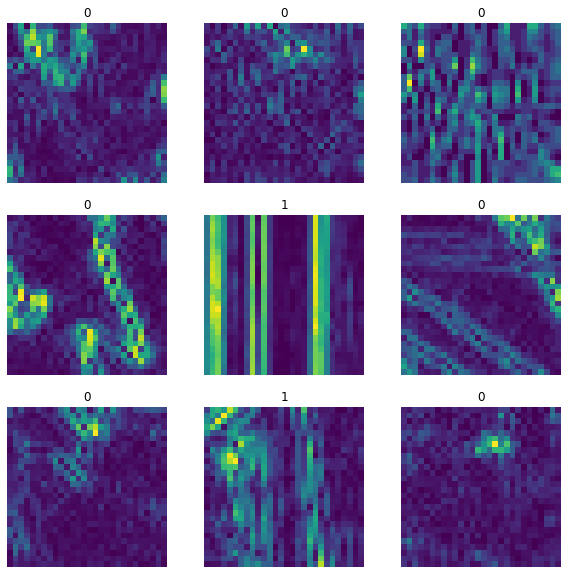

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## D) CNN classifier

In [6]:
model = keras.models.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=[28,28,1]),
    keras.layers.Conv2D(6, kernel_size=5, strides=1, padding="valid"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(12, kernel_size=5, strides=1, padding="valid"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(192),
    keras.layers.Dense(2, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 12)          1812      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 12)          0         
_________________________________________________________________
flatten (Flatten)            (None, 192)               0         
_________________________________________________________________
dense (Dense)                (None, 192)               3

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(
    ds_train, batch_size=16, epochs=20, verbose=2,
    validation_data=ds_validation, shuffle=True,
)

Epoch 1/20
44/44 - 1s - loss: 0.5210 - accuracy: 0.8098 - val_loss: 0.4401 - val_accuracy: 0.8613
Epoch 2/20
44/44 - 1s - loss: 0.3928 - accuracy: 0.9222 - val_loss: 0.4055 - val_accuracy: 0.8960
Epoch 3/20
44/44 - 1s - loss: 0.3746 - accuracy: 0.9323 - val_loss: 0.3725 - val_accuracy: 0.9422
Epoch 4/20
44/44 - 1s - loss: 0.3540 - accuracy: 0.9568 - val_loss: 0.3702 - val_accuracy: 0.9480
Epoch 5/20
44/44 - 1s - loss: 0.3382 - accuracy: 0.9726 - val_loss: 0.3374 - val_accuracy: 0.9827
Epoch 6/20
44/44 - 1s - loss: 0.3323 - accuracy: 0.9827 - val_loss: 0.3331 - val_accuracy: 0.9827
Epoch 7/20
44/44 - 1s - loss: 0.3288 - accuracy: 0.9841 - val_loss: 0.3332 - val_accuracy: 0.9827
Epoch 8/20
44/44 - 1s - loss: 0.3234 - accuracy: 0.9942 - val_loss: 0.3298 - val_accuracy: 0.9884
Epoch 9/20
44/44 - 1s - loss: 0.3245 - accuracy: 0.9914 - val_loss: 0.3300 - val_accuracy: 0.9827
Epoch 10/20
44/44 - 1s - loss: 0.3251 - accuracy: 0.9899 - val_loss: 0.3304 - val_accuracy: 0.9884
Epoch 11/20
44/44 -

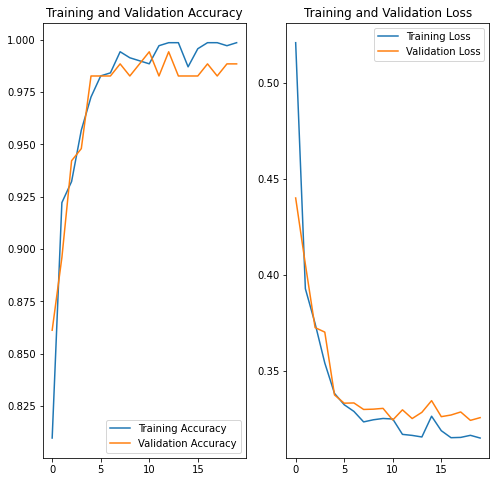

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Validation

In [51]:
ds_test = keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\VArri\Documents\PowerLines\images\visuel\cropped_test", 
    labels='inferred',
    label_mode = "int",
    color_mode = 'grayscale',
    batch_size = batch_size,
    image_size = (img_height, img_width),
    shuffle = True, 
    seed=123,
)


Found 142 files belonging to 2 classes.


In [52]:
predict = model.predict(ds_test)

In [53]:
TP, FP, TN, FN = 0,0,0,0

y = np.concatenate([y for x, y in ds_test], axis=0)
print(len(y))

predict = np.argmax(predict, axis=1)
print(len(predict))

for i in range(len(predict)):
    if predict[i]==y[i] and predict[i]==1:
        TP+=1
    elif predict[i]==y[i] and predict[i]==0:
        TN+=1
    elif predict[i]!=y[i] and predict[i]==1:
        FP+=1
    elif predict[i]!=y[i] and predict[i]==0:
        FN+=1

acc = (TP+TN)/(TP+TN+FP+FN)
recall = TP / (TP + FN)
print('Accuracy is {} %'.format(acc*100))
print('Recall is {} %'.format(recall*100))

142
142
Accuracy is 56.33802816901409 %
Recall is 68.75 %
